In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [2]:
# set the dimensions
N = 100
D = 2
M = 4
K = 3

In [3]:
# set the initial weights
np.random.seed(9)
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [4]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(2, 4)
(4,)
(4, 3)
(3,)


In [5]:
print(W1)
print()
print(b1)

[[ 1.10855471e-03 -2.89544069e-01 -1.11606630e+00 -1.28827567e-02]
 [-3.78361464e-01 -4.81135363e-01 -1.51733118e+00 -4.90871981e-01]]

[-0.24068058 -0.64794746  0.63589108  1.74011731]


In [6]:
print(W2)
print()
print(b2)

[[ 0.29668222  0.70750366  1.82281576]
 [ 0.43076903  1.54272963 -0.90072117]
 [-0.13712501  1.29757901  0.67527117]
 [ 0.03195812  0.9181459   0.38050947]]

[ 0.51636749 -0.35523946  0.208777  ]


In [7]:
# Create three clusters
X, t = make_blobs(n_features=2, centers=3)

In [8]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [9]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

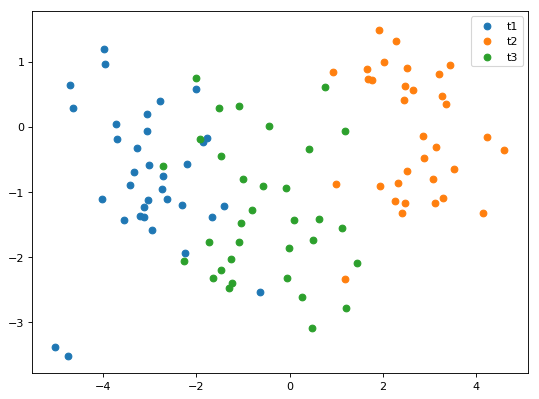

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't3')
plt.legend()
plt.show()

## Log reg

In [11]:
def Z(X, W, b):
    return np.dot(X, W) + b

In [12]:
def sig(Z):
    return 1/(1+np.exp(-Z))

In [13]:
def soft(Z):
    exp_Z = np.exp(Z)
    return exp_Z/np.sum(exp_Z, axis=1, keepdims=True)

In [14]:
Z1 = Z(X, W1, b1)
Z1.shape

(100, 4)

In [15]:
y1 = sig(Z1)
y1.shape

(100, 4)

In [16]:
Z2 = Z(y1, W2, b2)
Z2.shape

(100, 3)

In [17]:
y2 = soft(Z2)
y2.shape

(100, 3)

In [18]:
def ohe(t):
    result = np.zeros((N,K))
    for i in range(len(t)):
        result[i, t[i]] = 1
    return result

In [19]:
def cost(t, y):
    return -t*np.log(y)

In [20]:
cost1 = cost(ohe(t), y2)
cost1.shape

(100, 3)

In [21]:
def error(cost):
    return (cost.sum())/N

In [22]:
err0 = error(cost1)
err0

1.6850577128658057

In [23]:
def accuracy(t, y):
    return (t==np.round(y)).mean()

In [24]:
acc0 = accuracy(ohe(t), y2)
acc0

0.4666666666666667

In [25]:
err_reg = []
acc_reg = []
tt = 1

In [26]:
lr = 0.001

m_W1 = 0
m_b1 = 0
m_W2 = 0
m_b2 = 0

v_W1 = 0
v_b1 = 0
v_W2 = 0
v_b2 = 0

decay_m = 0.9
decay_v = 0.999
eps = 10e-8

print('initial error: {}'.format(err0))

initial error: 1.6850577128658057


In [27]:
for e in range(15000):

    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    cost1 = cost(ohe(t), y2)
    error1 = error(cost1)
    
    # gradients
    dZ2 = (ohe(t) - y2)
    dw2 = np.dot(y1.T, dZ2)
    db2 = (dZ2.sum(axis=0))
    dZ1 = np.dot(dZ2, W2.T)*(y1*(1-y1))
    dw1 = np.dot(X.T, dZ1)
    db1 = (dZ1.sum(axis=0))
    
    # First moment - m
    m_W2 = decay_m*m_W2 + (1-decay_m)*dw2
    m_b2 = decay_m*m_b2 + (1-decay_m)*db2
    m_W1 = decay_m*m_W1 + (1-decay_m)*dw1
    m_b1 = decay_m*m_b1 + (1-decay_m)*db1

    # Second moment - v
    v_W2 = decay_v*v_W2 + (1-decay_v)*dw2*dw2
    v_b2 = decay_v*v_b2 + (1-decay_v)*db2*db2
    v_W1 = decay_v*v_W1 + (1-decay_v)*dw1*dw1
    v_b1 = decay_v*v_b1 + (1-decay_v)*db1*db1

    # Bias correction for m
    m_hat_W2 = m_W2/(1-decay_m**tt)
    m_hat_b2 = m_b2/(1-decay_m**tt)
    m_hat_W1 = m_W1/(1-decay_m**tt)
    m_hat_b1 = m_b1/(1-decay_m**tt)

    # Bias correction for v
    v_hat_W1 = v_W1/(1-decay_v**tt)
    v_hat_b1 = v_b1/(1-decay_v**tt)
    v_hat_W2 = v_W2/(1-decay_v**tt)
    v_hat_b2 = v_b2/(1-decay_v**tt)
    
    # Update t
    tt += 1
    
    W2 += (lr*m_hat_W2)/(np.sqrt(v_hat_W2 + eps))
    b2 += (lr*m_hat_b2)/(np.sqrt(v_hat_b2 + eps))
    W1 += (lr*m_hat_W1)/(np.sqrt(v_hat_W1 + eps))
    b1 += (lr*m_hat_b1)/(np.sqrt(v_hat_b1 + eps))
    
    if e % 100 == 0:
        err_reg.append(error1)
        acc_reg.append(accuracy(ohe(t), y2))
        print('error:{}'.format(error1))

error:1.6850577128658057
error:1.403291353849536
error:1.2555913470756996
error:1.169223283377946
error:1.1048978565058716
error:1.0391082914066738
error:0.9625385940764598
error:0.8785450933121481
error:0.8020705620748579
error:0.7387083821691246
error:0.6855913845764274
error:0.6396067899827199
error:0.5989518203353833
error:0.5627794260319028
error:0.5306906826460615
error:0.5023999253076223
error:0.47757958316345495
error:0.4558365354425095
error:0.4367509758102169
error:0.4199195092284309
error:0.40498024524879483
error:0.39162165337723037
error:0.379582421419818
error:0.36864757275252613
error:0.3586435494184279
error:0.3494333912543124
error:0.34091231534209526
error:0.3330035669999672
error:0.32565418565176146
error:0.3188302681386419
error:0.31251146785543005
error:0.30668488104681246
error:0.3013390376160149
error:0.29645911359243277
error:0.2920243446377285
error:0.28800788597548715
error:0.2843784648576497
error:0.2811026962384468
error:0.27814709584400643
error:0.275479347

In [28]:
accuracy(ohe(t), y2)

0.9533333333333334

## Graph

### Constant learning rate

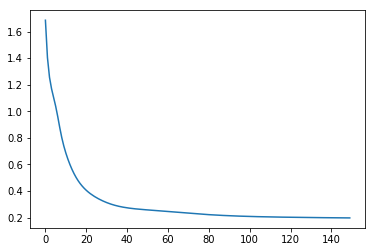

In [29]:
plt.plot(err_reg)
plt.show()

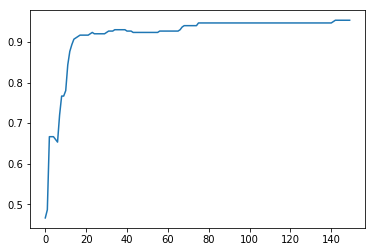

In [30]:
plt.plot(acc_reg)
plt.show()

## Decision Boundary

In [31]:
def predict_all(X):
    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    return np.argmax(y2, axis=1)

In [32]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(8, 6), dpi=80)
    plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.18)
    plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.brg)
    plt.title('MLP with Adam Decision Boundary')
    plt.savefig('./data/MLP_Adam.png')
    plt.show()

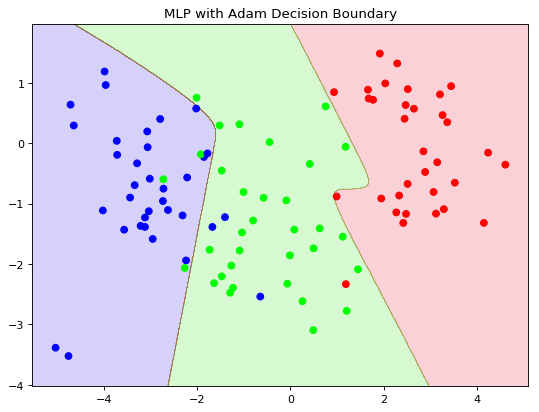

In [33]:
plot_decision_boundary(lambda x: predict_all(x))